# Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url ='https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## 1.State your Null Hypothesis and Alternative Hypothesis


Null Hypothesis: There is no significant difference between the insurance charge for smokers vs non smokers

Alternative Hypothesis: There is a significant difference between the insurance charge for smokers vs non smokers

Significance Level (Alpha): For this test, our alpha value is 0.05.

## 2.Select the correct test according to the data type and number of samples

Explore the data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# see how many smokers and non smokers
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
# Filtering out those who smoke and those who dont smoke
smoke_df = df.loc[df['smoker']== "yes"].copy()
no_smoke_df = df.loc[df['smoker']== "no"].copy()

In [11]:
#Define our feature of interest
smoke_charges = smoke_df['charges']
no_smoke_charges = no_smoke_df['charges']

**Based on the data we have we will use the Independent t-test (2-sample)**

## 3.Test the assumptions for Independent t-test.

### Check for & Remove Outliers

In [12]:
# Check for outliers in smoker group
zscores1= stats.zscore(smoke_charges)
outliers1 = abs(zscores1)>3
np.sum(outliers1)

0

In [13]:
# Check for outliers in non smoker group
zscores2= stats.zscore(no_smoke_charges)
outliers2 = abs(zscores2)>3
np.sum(outliers2)

24

We have outliers so we need to remove these

In [14]:
# remove outliers from non smoker group
no_smoke_charges = no_smoke_charges[(np.abs(stats.zscore(no_smoke_charges)) < 3)]

In [15]:
# Check for outliers in non smoker group again
zscores3= stats.zscore(no_smoke_charges)
outliers3 = abs(zscores3)>3
np.sum(outliers3)

19

### Check for Normality

In [16]:
# test the smoke group for normality
result_smoke_charges = stats.normaltest(smoke_charges)
result_smoke_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [17]:
# test the non-smoke group for normality
result_no_smoke_charges = stats.normaltest(no_smoke_charges)
result_no_smoke_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

**Our p-values for both group are well below 0.05 which means our data is NOT normally distributed. Since, our our sample size is large enough we proceed without satisfying this test.
Since we have sample sizes of 15 per group, this is considered sufficient for independent test**

### Test Assumption of Equal Variance

In [18]:
# Test for equal variance
result = stats.levene(smoke_charges, no_smoke_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

We don't have equal variances. So we add (equal_var=False)

## 4.Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [19]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoke_charges, no_smoke_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

## 5.Interpret your p-value and reject or fail to reject your null hypothesis

**Our p value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference between the insurance charge of smokers vs non-smokers**

## 6.Show a supporting visualization that helps display the result

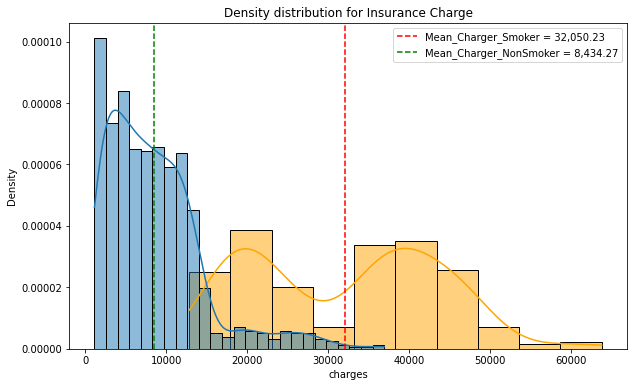

In [21]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(smoke_df,x='charges', ax=ax,stat='density', kde = True, color='orange')
sns.histplot(no_smoke_df,x='charges', ax=ax,stat='density', kde = True)
ax.axvline(smoke_df['charges'].mean(),ls='--', color = 'red',label=f'Mean_Charger_Smoker = {(smoke_df["charges"].mean()):,.2f}')
ax.axvline(no_smoke_df['charges'].mean(),ls='--', color = 'green',label=f'Mean_Charger_NonSmoker = {(no_smoke_df["charges"].mean()):,.2f}')
ax.set_title(f'Density distribution for Insurance Charge')
ax.legend();

# Q2. Are men more likely to smoke than women?

## 1.State your Null Hypothesis and Alternative Hypothesis

Null Hypothesis: There is no relationship between Gender of the person and if someone is a smoker or non-smoker

Alternative Hypothesis: The Gender of the person influences if someone is a smoker or not a smoker

Significance Level (Alpha): For this test, our alpha value is 0.05.

## 2.Select the correct test according to the data type and number of samples

Explore the data:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Since we are evaluating a binary target category vs categorical groups we use Chi-Squared Test

In [24]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


## 3.Test the assumptions for Chi-Square test

## 4.Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [25]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

## 5.Interpret your p-value and reject or fail to reject your null hypothesis

In [26]:
print(p)
p<.05

0.006548143503580696


True

**Since our p < .05, we reject the null hypothesis that there is no relationship between a Gender and if they are a Smoker.
This means that we accept the alternate hypothesis and conclude that there is a relationship between a persons Gender and whether or not they are a smoker**

## 6.Show a supporting visualization that helps display the result

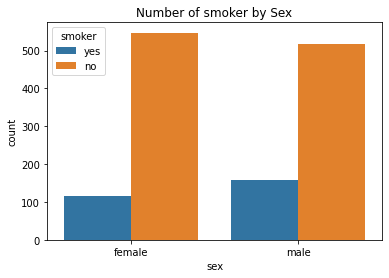

In [27]:
# let's visualize smokers by sex
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smoker by Sex");


# Q3. Do different regions have different charges, on average?

## 1.State your Null Hypothesis and Alternative Hypothesis

Null Hypothesis: Different regions have the same charges on average

Alternative Hypothesis: Different regions have different charges on average

Significance Level (Alpha): For this test, our alpha value is 0.05.

## 2.Select the correct test according to the data type and number of samples

Explore the data:

In [28]:
# see the value counts for region
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Since we have 1 variable/feature with more than 2 groups that we want to compare we will use the ANOVA test

In [29]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## 3.Test the assumptions for ANOVA test.

### Check for & Remove Outliers

#### southwest

In [30]:
# Check for outliers in southwest
zscores1= stats.zscore(groups['southwest'])
outliers1 = abs(zscores1)>3
np.sum(outliers1)

8

We have outliers so we need to remove these

In [31]:
# remove outliers from southwest group
groups['southwest'] = groups['southwest'][(np.abs(stats.zscore(groups['southwest'])) < 3)]

#### southeast

In [32]:
# Check for outliers in southwest
zscores2= stats.zscore(groups['southeast'])
outliers2 = abs(zscores2)>3
np.sum(outliers2)

2

We have outliers so we need to remove these

In [33]:
# remove outliers from southeast
groups['southeast'] = groups['southeast'][(np.abs(stats.zscore(groups['southeast'])) < 3)]

#### northwest

In [34]:
# Check for outliers in northwest
zscores3= stats.zscore(groups['northwest'])
outliers3 = abs(zscores3)>3
np.sum(outliers3)

7

We have outliers so we need to remove these

In [35]:
# remove outliers from northwest
groups['northwest'] = groups['northwest'][(np.abs(stats.zscore(groups['northwest'])) < 3)]

#### northeast

In [36]:
# Check for outliers in non smoker group
zscores4= stats.zscore(groups['northeast'])
outliers4 = abs(zscores2)>3
np.sum(outliers4)

2

We have outliers so we need to remove these

In [37]:
# remove outliers from northeast
groups['northeast'] = groups['northeast'][(np.abs(stats.zscore(groups['northeast'])) < 3)]

### Check for Normality

In [38]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [39]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


We can see that each group does not have a normal distribution.

Our p-values for all 4 group are well below 0.05 which means our data is NOT normally distributed. Since, our sample size is large enough we proceed without satisfying this test.

Since we have sample sizes of 15 per group, this is considered sufficient for ANOVA test.

### Test Assumption of Equal Variance

In [41]:
# Test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

Looks like we don't have equal variances so we need to run a non-parametric test

## 4.Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [42]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *groups.values())
result


KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

## 5.Interpret your p-value and reject or fail to reject your null hypothesis

**Our p value > alpha (0.05), so we accept the null hypothesis that Different regions have the same charges on average**

## 6.Show a supporting visualization that helps display the result

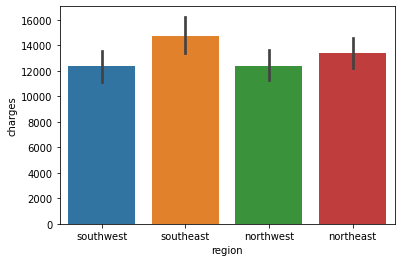

In [43]:
sns.barplot(data=df, x='region',y='charges');